# Imports

In [1]:
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.io import imsave
from skimage.transform import resize
import seaborn as sns
from utils import *

import warnings
warnings.filterwarnings("ignore", category=UserWarning)


## Dataframe


In [2]:
df = pd.read_csv("data/chexpert_plus_240401_cleaned.csv")

In [3]:
print('Total number of acquisitions:', len(df))
print('Total number of patients:', len(df['deid_patient_id'].unique()))
print('Train/Valid:', df.split.value_counts())


Total number of acquisitions: 112105
Total number of patients: 39417
Train/Valid: split
train    111984
valid       121
Name: count, dtype: int64


## Image examples

In [4]:
img_f = imread("/data4/CheXpert/CheXpert-v1.0/train/patient04528/study1/view1_frontal.jpg")
img_l = imread("/data4/CheXpert/CheXpert-v1.0/train/patient04528/study1/view2_lateral.jpg")

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img_f, cmap='gray')
ax[0].axis('off')
ax[0].set_title(f'Frontal \n {img_f.shape[0]}x{img_f.shape[1]}')
ax[1].imshow(img_l, cmap='gray')
ax[1].axis('off')
ax[1].set_title(f'Lateral \n {img_l.shape[0]}x{img_l.shape[1]}')

FileNotFoundError: No such file: 'c:\data4\CheXpert\CheXpert-v1.0\train\patient04528\study1\view1_frontal.jpg'

Text(0.5, 1.0, 'Lateral \n 224x224')

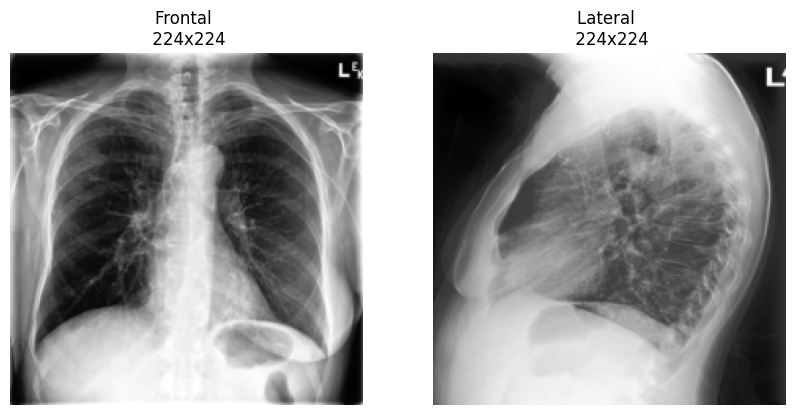

In [15]:
# Resized
img_f_resized = resize(img_f, (224, 224), preserve_range=True)
img_l_resized = resize(img_l, (224, 224), preserve_range=True)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img_f_resized, cmap='gray')
ax[0].axis('off')
ax[0].set_title(f'Frontal \n {img_f_resized.shape[0]}x{img_f_resized.shape[1]}')
ax[1].imshow(img_l_resized, cmap='gray')
ax[1].axis('off')
ax[1].set_title(f'Lateral \n {img_l_resized.shape[0]}x{img_l_resized.shape[1]}')


## Tabular Exploration

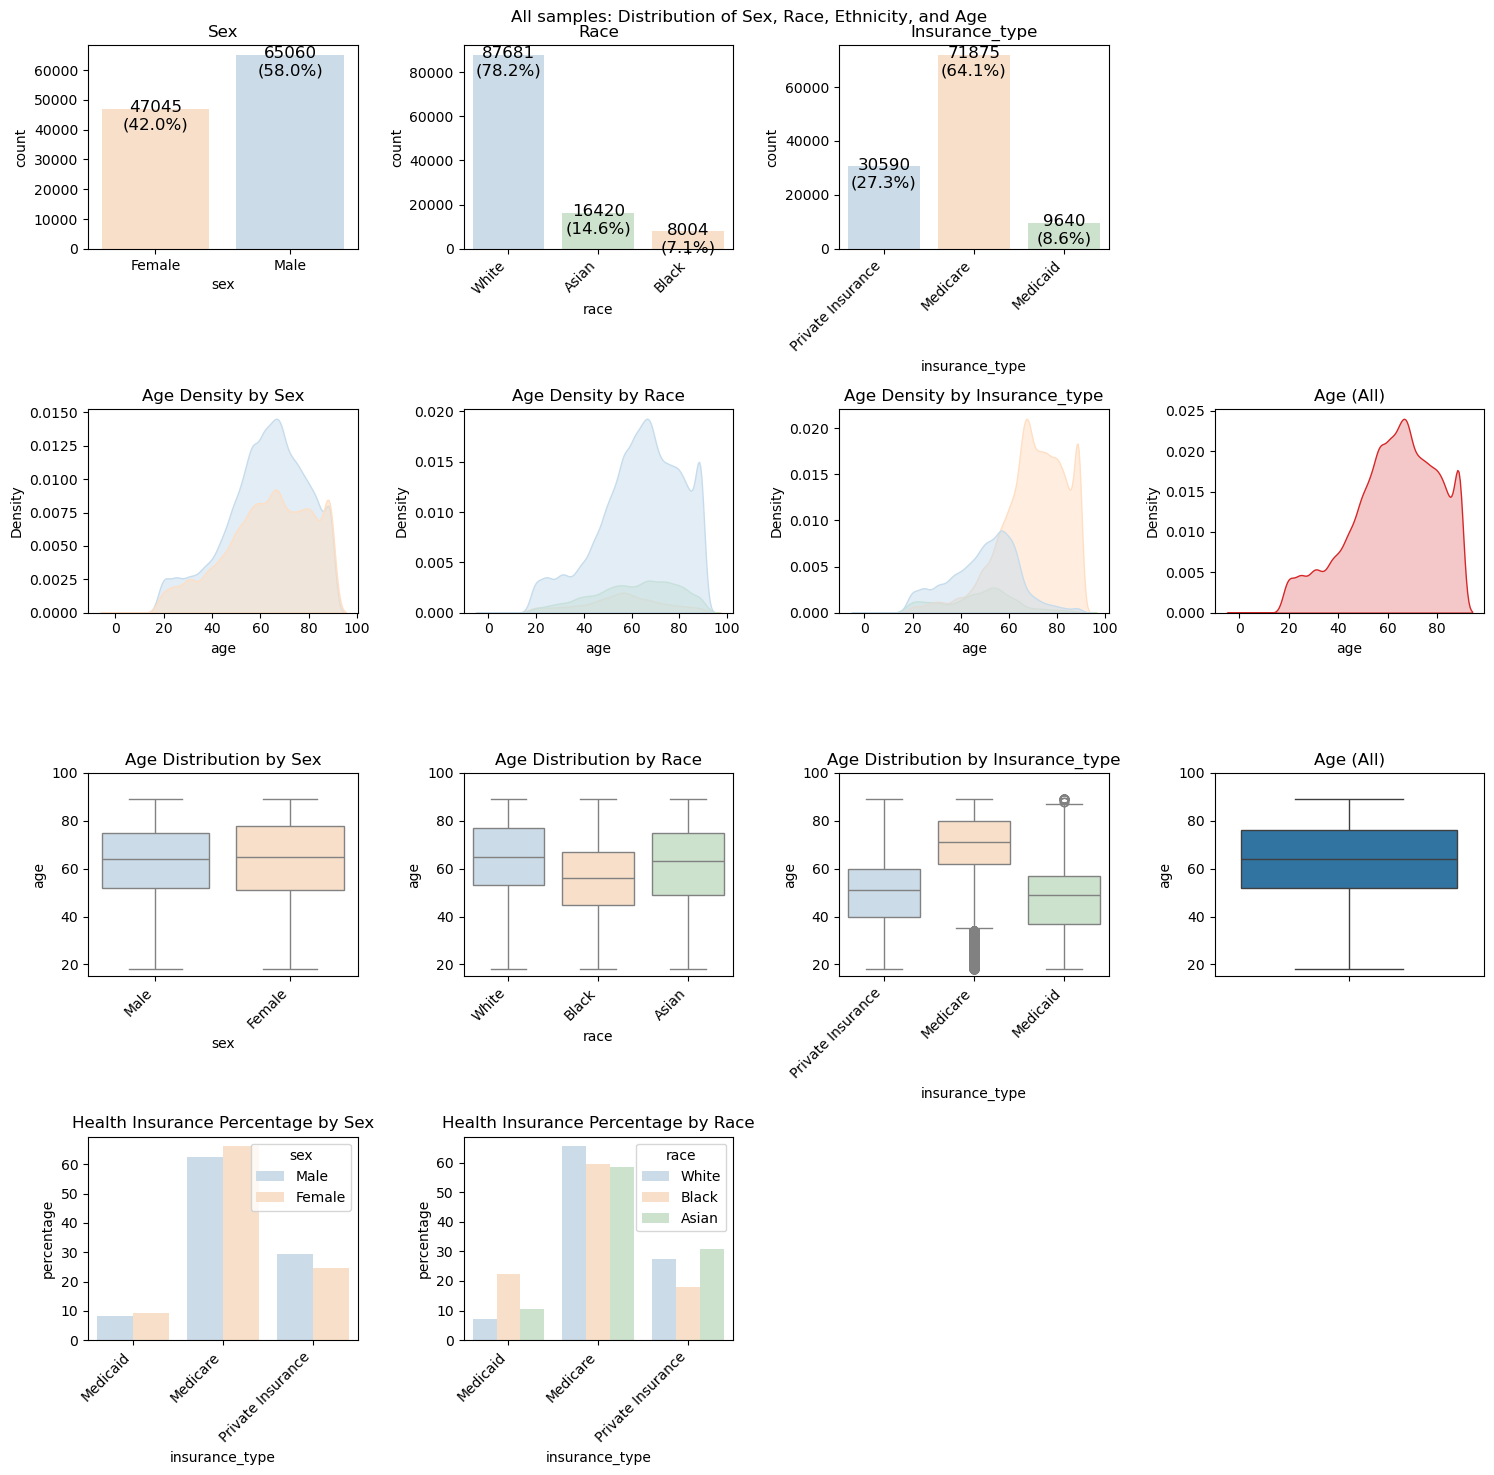

In [5]:
def plot_data_distribution(df, title='Data Distribution'):
    colors = get_colors(3)
    color_maps = {
        'sex': {'Male': colors[0], 'Female': colors[1]},
        'race': {'White': colors[0], 'Black': colors[1], 'Asian': colors[2]},
        'insurance_type': {'Private Insurance': colors[0], 'Medicare': colors[1], 'Medicaid': colors[2]}
    }

    fig, axes = plt.subplots(4, 4, figsize=(15, 15))
    fig.suptitle(title)

    # Categorical plots
    plot_categorical(df, 'sex', axes[0, 0], color_maps['sex'], df['sex'].value_counts().sum())
    plot_categorical(df, 'race', axes[0, 1], color_maps['race'], df['race'].value_counts().sum(), rotation=45)
    plot_categorical(df, 'insurance_type', axes[0, 2], color_maps['insurance_type'], df['insurance_type'].value_counts().sum(), rotation=45)
    axes[0, 3].axis('off')

    # Age distribution plots
    plot_age_distribution(df, axes[1, 3])
    plot_age_distribution(df, axes[1, 0], hue='sex', palette=color_maps['sex'])
    plot_age_distribution(df, axes[1, 1], hue='race', palette=color_maps['race'])
    plot_age_distribution(df, axes[1, 2], hue='insurance_type', palette=color_maps['insurance_type'])

    # Age boxplots
    plot_age_boxplot(df, axes[2, 3])
    plot_age_boxplot(df, axes[2, 0], x='sex', hue='sex', palette=color_maps['sex'], order=['Male', 'Female'])
    plot_age_boxplot(df, axes[2, 1], x='race', hue='race', palette=color_maps['race'], order=['White', 'Black', 'Asian'])
    plot_age_boxplot(df, axes[2, 2], x='insurance_type', hue='insurance_type', palette=color_maps['insurance_type'])

    # Insurance percentage plots
    plot_insurance_percentage(df, axes[3, 0], 'sex', hue_order=['Male', 'Female'], palette=color_maps['sex'])
    plot_insurance_percentage(df, axes[3, 1], 'race', hue_order=['White', 'Black', 'Asian'], palette=color_maps['race'])

    axes[3, 2].axis('off')
    axes[3, 3].axis('off')

    plt.tight_layout()
    plt.show()

plot_data_distribution(df, title='All samples: Distribution of Sex, Race, Ethnicity, and Age')
